In [2]:
import os
import copy as cp
import csv
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# DATA PARAMETERS

survey = "HERMES" # survey name
sample_rate = 1 # sample rate of the data
min_wv = 3800 # minimum wavelength of the data
max_wv = 9000 # maximum wavelength of the data
spec_dir = r"C:\Users\kentb\Desktop\PDM\data\Hermes\delCep_Hermes_spectra" # directory of the spectrum
obs_data = Observations(survey=survey, sample_rate=sample_rate, min_wv=min_wv, max_wv=max_wv,
                        target_visits_lib=spec_dir)
obs_data2 = cp.deepcopy(obs_data)

let's goooo
Using target_visits_lib: C:\Users\kentb\Desktop\PDM\data\Hermes\delCep_Hermes_spectra
Selected directory: C:\Users\kentb\Desktop\PDM\data\Hermes\delCep_Hermes_spectra


In [4]:
# Preprocess the spectra
for i in obs_data2.time_series.vals:
    i = i.InterpolateSpectrum()
    i = i.FilterSpectrum(lowcut=20, highcut=0.15, order = 1)
    i = i.ApplyCosineBell(alpha=0.3)
for i in obs_data.time_series.vals:
    i = i.InterpolateSpectrum()

In [5]:
# store the spectra in a two column csv file with columns "wave" and "flux"

with open(os.path.join("./", f"hermes_test.csv"), 'w',newline='',encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(["wave","flux"])
    writer.writerows(zip(obs_data.time_series.vals[0].wv[0],obs_data.time_series.vals[0].sp[0]))

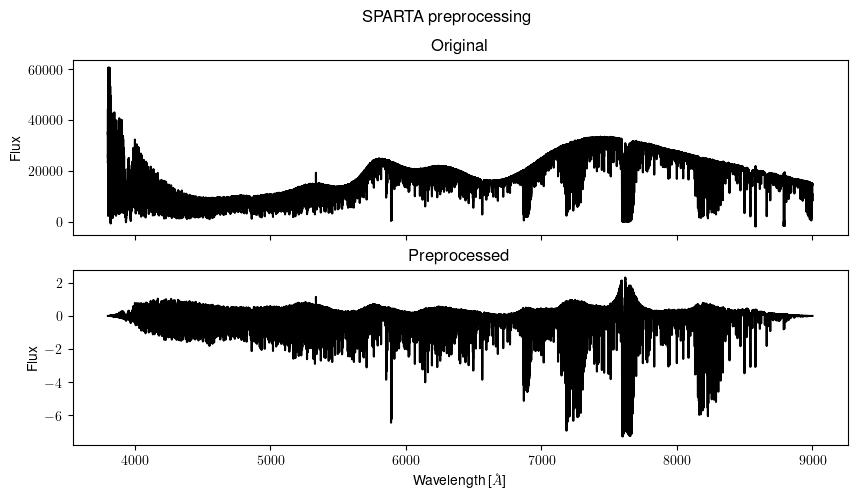

In [15]:
plt.style.use('sparta')
fig,axs = plt.subplots(2,1,figsize=(10, 5), sharex = True)
fig.suptitle("SPARTA preprocessing")
axs[0].plot(obs_data.time_series.vals[0].wv[0],obs_data.time_series.vals[0].sp[0])
axs[1].plot(obs_data2.time_series.vals[0].wv[0],obs_data2.time_series.vals[0].sp[0])
axs[0].set_ylabel("Flux")
axs[1].set_ylabel("Flux")
axs[1].set_xlabel(r"Wavelength [$\AA$]")
axs[0].set_title("Original")
axs[1].set_title("Preprocessed")
plt.savefig("hermes_test_sparta.png",dpi = 450)
plt.show()